In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt     
import os 

In [2]:
from glob import glob

In [3]:

def plot_history(history : tf.keras.callbacks.History):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')




In [4]:
_training_data = np.load('training_data.npy')
labels = np.load('labels.npy')

In [5]:
#getting the train and validation data
from sklearn.model_selection import train_test_split
train_dice, val_dice, train_labels, val_labels = train_test_split(
    _training_data, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)




In [6]:
train_dice.shape

(5256, 128, 128, 1)

In [7]:
val_dice.shape

(1315, 128, 128, 1)

In [8]:
#parameters
input_size = 128
filter = 30


strides = (2, 2)
pool_size = (2,2)
kernel_size = (5,5)

In [9]:
from tensorflow.keras import layers, models

# Create the first version of the model
model = models.Sequential([
    layers.Conv2D(filters=filter,kernel_size=kernel_size,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='relu',input_shape=(128,128,1)),
    layers.MaxPooling2D(pool_size=pool_size,strides=strides,padding='same'),
    layers.Dropout(0.4),
    layers.Conv2D(filters=filter/2,kernel_size=kernel_size,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='relu'),
    layers.MaxPooling2D(pool_size=pool_size,strides=strides,padding='same'),
    layers.Dropout(0.5),
    layers.Flatten(),
    #layers.Dense(128,activation='relu'),
    layers.Dense(6,activation='Softmax'),
    
    
    
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 30)      780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 30)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 30)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 15)        11265     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 15)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 15)        0

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000006),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
with tf.device('/GPU:0'):
    history = model.fit(train_dice,train_labels,epochs=9,validation_data=(val_dice,val_labels),batch_size=32)


Epoch 1/9
165/165 [==============================] - 14s 56ms/step - loss: 1.7367 - accuracy: 0.2833 - val_loss: 1.7414 - val_accuracy: 0.4259
Epoch 2/9
 33/165 [=====>........................] - ETA: 6s - loss: 1.7045 - accuracy: 0.3125

KeyboardInterrupt: 

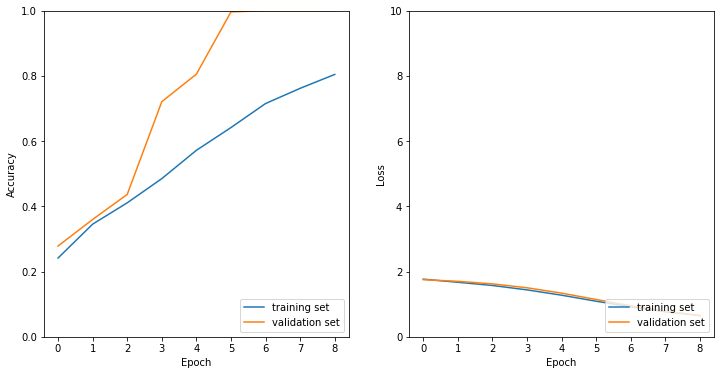

In [ ]:
plot_history(history)

In [ ]:
#model.save('model60')

INFO:tensorflow:Assets written to: model60\assets


INFO:tensorflow:Assets written to: model60\assets
